<a href="https://colab.research.google.com/github/shubhamksingh1/RecommendationEngine/blob/main/CollaborativeFiltering/Perspective/Keras/Collaborative_User_Based_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pickle
import matplotlib.pyplot as plt


# Read Files

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Collaborative_Recommendation/rating_without_zero_v1.csv')

## Preprocessing

In [ ]:
df.shape

(704, 3)

In [ ]:
df.head()

,uid,asset_id,Ratings
0,1,12,3
1,1,15,4
2,1,17,4
3,1,18,5
4,1,20,4


In [ ]:
df.tail()

,uid,asset_id,Ratings
699,100,53,5
700,100,63,3
701,100,67,5
702,100,78,2
703,100,81,5


In [ ]:
print(sorted(df.uid.unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [ ]:
df.uid.value_counts()[-20:]

45    3
75    3
38    3
80    3
79    3
78    3
37    3
76    3
42    3
44    3
25    3
49    3
41    3
55    3
54    3
46    2
59    2
66    2
83    2
52    2
Name: uid, dtype: int64

In [ ]:
df.uid.value_counts()[-20:]

45    3
75    3
38    3
80    3
79    3
78    3
37    3
76    3
42    3
44    3
25    3
49    3
41    3
55    3
54    3
46    2
59    2
66    2
83    2
52    2
Name: uid, dtype: int64

### First, need to perform some preprocessing to encode users and assets as integer indices.


In [ ]:
user_ids = sorted(df["uid"].unique().tolist())
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}


In [ ]:
print(user_ids)
print(user2user_encoded)
print(userencoded2user)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 67, 69: 68, 70: 69, 71: 70, 72: 71, 73: 72, 74: 73, 75: 74, 76: 75, 77: 76, 78: 77, 7

In [ ]:
asset_ids = sorted(df["asset_id"].unique().tolist())
asset2asset_encoded = {x: i for i, x in enumerate(asset_ids)}
asset_encoded2asset = {i: x for i, x in enumerate(asset_ids)}

In [ ]:
print(asset_ids)
print(asset2asset_encoded)
print(asset_encoded2asset)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85]
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 59: 57, 60: 58, 61: 59, 62: 60, 63: 61, 65: 62, 66: 63, 67: 64, 68: 65, 69: 66, 70: 67, 71: 68, 72: 69, 73: 70, 74: 71, 75: 72, 76: 73, 77: 74, 78: 75, 79: 76, 80: 77, 81: 78, 83: 79, 84: 80, 85: 81}
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7,

In [ ]:
df

,uid,asset_id,Ratings
0,1,12,3
1,1,15,4
2,1,17,4
3,1,18,5
4,1,20,4
...,...,...,...
699,100,53,5
700,100,63,3
701,100,67,5
702,100,78,2


In [ ]:

df["user"] = df["uid"].map(user2user_encoded)
df["asset"] = df["asset_id"].map(asset2asset_encoded)

In [ ]:
df

,uid,asset_id,Ratings,user,asset
0,1,12,3,0,11
1,1,15,4,0,14
2,1,17,4,0,16
3,1,18,5,0,17
4,1,20,4,0,19
...,...,...,...,...,...
699,100,53,5,99,52
700,100,63,3,99,61
701,100,67,5,99,64
702,100,78,2,99,75


In [ ]:
num_users = len(user2user_encoded)
num_assets = len(asset_encoded2asset)
print("num_users",num_users)
print("num_assets",num_assets)

num_users 100
num_assets 82


In [ ]:

df["rating"] = df["Ratings"].values.astype(np.float32)

In [ ]:
df

,uid,asset_id,Ratings,user,asset,rating
0,1,12,3,0,11,3.0
1,1,15,4,0,14,4.0
2,1,17,4,0,16,4.0
3,1,18,5,0,17,5.0
4,1,20,4,0,19,4.0
...,...,...,...,...,...,...
699,100,53,5,99,52,5.0
700,100,63,3,99,61,3.0
701,100,67,5,99,64,5.0
702,100,78,2,99,75,2.0


In [ ]:

# min and max ratings will be used to normalize the ratings later
min_rating = min(df["rating"])
max_rating = max(df["rating"])

In [ ]:


print(
    "Number of users: {}, Number of Assets: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_assets, min_rating, max_rating
    )
)


Number of users: 100, Number of Assets: 82, Min rating: 1.0, Max rating: 5.0


### Preparing Training And Validation Data

In [ ]:
df

,uid,asset_id,Ratings,user,asset,rating
0,1,12,3,0,11,3.0
1,1,15,4,0,14,4.0
2,1,17,4,0,16,4.0
3,1,18,5,0,17,5.0
4,1,20,4,0,19,4.0
...,...,...,...,...,...,...
699,100,53,5,99,52,5.0
700,100,63,3,99,61,3.0
701,100,67,5,99,64,5.0
702,100,78,2,99,75,2.0


In [ ]:
df = df.sample(frac=1, random_state=42)

In [ ]:
df

,uid,asset_id,Ratings,user,asset,rating
296,37,4,4,36,3,4.0
81,7,22,4,6,21,4.0
77,7,15,4,6,14,4.0
208,21,36,3,20,35,3.0
318,43,19,5,42,18,5.0
...,...,...,...,...,...,...
71,6,71,5,5,68,5.0
106,9,22,2,8,21,2.0
270,32,3,5,31,2,5.0
435,72,24,5,71,23,5.0


In [ ]:

x = df[["user", "asset"]].values

In [ ]:
x

array([[36,  3],
       [ 6, 21],
       [ 6, 14],
       ...,
       [31,  2],
       [71, 23],
       [ 8,  8]])

In [ ]:

# Normalize the targets between 0 and 1. Makes it easy to train.
y = df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

In [ ]:
y

array([0.75, 0.75, 0.75, 0.5 , 1.  , 1.  , 0.75, 0.75, 0.75, 0.5 , 0.75,
       0.  , 1.  , 0.75, 0.5 , 1.  , 0.25, 0.5 , 0.5 , 0.25, 0.5 , 0.75,
       0.25, 1.  , 0.75, 0.5 , 0.5 , 0.25, 0.  , 0.5 , 0.25, 1.  , 0.5 ,
       0.25, 1.  , 1.  , 0.25, 0.  , 0.75, 0.  , 1.  , 1.  , 1.  , 0.5 ,
       1.  , 0.5 , 0.25, 0.25, 1.  , 0.75, 0.  , 1.  , 0.  , 0.75, 0.  ,
       0.25, 0.5 , 1.  , 0.75, 0.25, 0.25, 1.  , 0.5 , 0.25, 0.25, 0.25,
       0.5 , 0.25, 0.5 , 1.  , 0.25, 0.5 , 1.  , 1.  , 0.25, 0.5 , 0.5 ,
       1.  , 0.75, 0.5 , 0.75, 0.25, 0.25, 0.75, 1.  , 1.  , 0.75, 1.  ,
       0.75, 0.75, 1.  , 0.5 , 0.5 , 0.5 , 1.  , 0.25, 0.75, 0.25, 0.75,
       0.5 , 0.25, 0.5 , 0.75, 0.5 , 1.  , 0.5 , 0.5 , 0.5 , 0.25, 0.5 ,
       1.  , 0.5 , 0.5 , 1.  , 0.75, 0.  , 0.5 , 0.  , 0.5 , 1.  , 0.5 ,
       0.  , 0.5 , 0.5 , 1.  , 0.5 , 0.5 , 0.5 , 0.75, 0.5 , 0.75, 0.  ,
       0.75, 0.25, 0.25, 0.5 , 0.25, 1.  , 0.25, 0.5 , 0.75, 0.25, 0.  ,
       0.5 , 0.75, 0.25, 1.  , 1.  , 0.5 , 1.  , 0.

In [ ]:

# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * df.shape[0])

In [ ]:

x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)


In [ ]:
print(x_train,y_train)

[[36  3]
 [ 6 21]
 [ 6 14]
 ...
 [30 66]
 [19 36]
 [14 32]] [0.75 0.75 0.75 0.5  1.   1.   0.75 0.75 0.75 0.5  0.75 0.   1.   0.75
 0.5  1.   0.25 0.5  0.5  0.25 0.5  0.75 0.25 1.   0.75 0.5  0.5  0.25
 0.   0.5  0.25 1.   0.5  0.25 1.   1.   0.25 0.   0.75 0.   1.   1.
 1.   0.5  1.   0.5  0.25 0.25 1.   0.75 0.   1.   0.   0.75 0.   0.25
 0.5  1.   0.75 0.25 0.25 1.   0.5  0.25 0.25 0.25 0.5  0.25 0.5  1.
 0.25 0.5  1.   1.   0.25 0.5  0.5  1.   0.75 0.5  0.75 0.25 0.25 0.75
 1.   1.   0.75 1.   0.75 0.75 1.   0.5  0.5  0.5  1.   0.25 0.75 0.25
 0.75 0.5  0.25 0.5  0.75 0.5  1.   0.5  0.5  0.5  0.25 0.5  1.   0.5
 0.5  1.   0.75 0.   0.5  0.   0.5  1.   0.5  0.   0.5  0.5  1.   0.5
 0.5  0.5  0.75 0.5  0.75 0.   0.75 0.25 0.25 0.5  0.25 1.   0.25 0.5
 0.75 0.25 0.   0.5  0.75 0.25 1.   1.   0.5  1.   0.75 0.5  0.25 0.25
 0.5  0.25 0.75 0.75 1.   0.25 0.75 0.75 0.25 1.   0.75 0.5  0.75 0.75
 0.75 0.75 1.   0.5  1.   1.   1.   0.25 0.75 0.5  0.   1.   1.   1.
 0.5  0.75 0.75 0.5  1.   

In [ ]:
y_train.shape,x_train.shape

((633,), (633, 2))

In [ ]:
y_val.shape,x_val.shape

((71,), (71, 2))

# Model Create
We embed both users and assets in to 50-dimensional vectors.

The model computes a match score between user and asset embeddings via a dot product,
and adds a per-asset and per-user bias. The match score is scaled to the `[0, 1]`
interval via a sigmoid (since our ratings are normalized to this range).

In [ ]:
EMBEDDING_SIZE = 50


class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_assets, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_assets = num_assets
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.asset_embedding = layers.Embedding(
            num_assets,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.asset_bias = layers.Embedding(num_assets, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        asset_vector = self.asset_embedding(inputs[:, 1])
        asset_bias = self.asset_bias(inputs[:, 1])
        dot_user_asset = tf.tensordot(user_vector, asset_vector, 2)
        # Add all the components (including bias)
        x = dot_user_asset + user_bias + asset_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)



# Model Train

## Train the model based on the data split


In [ ]:
callback  = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  patience=20, restore_best_weights=True
)


In [ ]:

model = RecommenderNet(num_users, num_assets, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=0.001)
)


In [ ]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=5000,
    callbacks=[callback],
    verbose=1,
    validation_data=(x_val, y_val),
)


Epoch 1/5000
10/10 [==============================] - 0s 13ms/step - loss: 0.6488 - val_loss: 1.0741
Epoch 2/5000
10/10 [==============================] - 0s 8ms/step - loss: 0.6930 - val_loss: 1.0727
Epoch 3/5000
10/10 [==============================] - 0s 8ms/step - loss: 0.6663 - val_loss: 1.0679
Epoch 4/5000
10/10 [==============================] - 0s 8ms/step - loss: 0.6603 - val_loss: 1.0685
Epoch 5/5000
10/10 [==============================] - 0s 8ms/step - loss: 0.6879 - val_loss: 1.0694
Epoch 6/5000
10/10 [==============================] - 0s 9ms/step - loss: 0.6489 - val_loss: 1.0658
Epoch 7/5000
10/10 [==============================] - 0s 8ms/step - loss: 0.6867 - val_loss: 1.0594
Epoch 8/5000
10/10 [==============================] - 0s 8ms/step - loss: 0.6538 - val_loss: 1.0623
Epoch 9/5000
10/10 [==============================] - 0s 8ms/step - loss: 0.6626 - val_loss: 1.0640
Epoch 10/5000
10/10 [==============================] - 0s 8ms/step - loss: 0.6402 - val_loss: 1.065

In [ ]:
model.summary()

Model: "recommender_net_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      multiple                  5000      
_________________________________________________________________
embedding_9 (Embedding)      multiple                  100       
_________________________________________________________________
embedding_10 (Embedding)     multiple                  4100      
_________________________________________________________________
embedding_11 (Embedding)     multiple                  82        
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________


## Plot training and validation loss


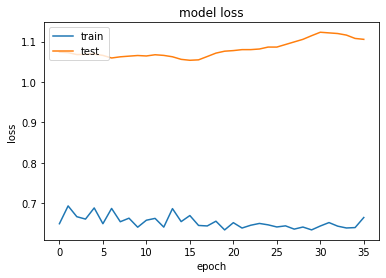

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()


# Show top 5 asset recommendations to a user


In [ ]:
asset_df = pd.read_pickle("/content/drive/MyDrive/Collaborative_Recommendation/MatrixFactorization/recommendation_v4.pkl")

In [ ]:
asset_df

,asset_id,asset_description,asset_title,custom_stop_desc,custom_stop_title,asset_description_cleaned,asset_title_cleaned,Domain
0,1,peter drucker the legendary management scholar...,the ascent of the smarter faster lighter enter...,"['3a', 'a', 'an', 'on', 'at', 'is', 's', 'do',...",['of'],peter drucker legendary management scholar con...,ascent smarter faster lighter enterprise,CX
1,2,the software development community has been us...,agile s day has truly arrived,"['a', 'u', 'we', 'k', 'i', 'on', 'at', 'is', '...",['s'],software development community using term agil...,agile day truly arrived,Agile
2,3,many exciting new digital technologies have ev...,riding the cognitive wave,"['a', 'we', 'e', 'an', 'on', 'at', 'is', 'do',...",[],many exciting new digital technology evolved r...,riding cognitive wave,AI
3,4,we have all seen some eye bulging numbers in r...,using iot data to understand how your products...,"['hp', 'a', 'we', 'an', 'on', 'at', 'is', 's',...",['to'],seen eye bulging number recent year internet t...,using iot data understand product perform,IOT
4,5,you probably need little evidence to believe t...,the view inside our take on the customer exper...,"['a', 'we', 'e', 'an', 'i', 'on', 'at', 'is', ...",['on'],probably need little evidence believe experien...,view inside take customer experience revolution,CX
...,...,...,...,...,...,...,...,...
77,80,this report is based on tcs larger study on di...,tcs cmo study how retailers are digitally pers...,"['3a', 'a', 'we', 'on', 'at', 'is', 's', 'do',...",['to'],report based tc larger study digital marketing...,tc cmo study retailer digitally personalizing ...,Industry
78,81,this report on marketers in the travel transpo...,tcs cmo study how travel transportation and ho...,"['a', 'we', 'e', 'on', 'is', 's', 'do', 'go', ...",['to'],report marketer travel transportation hospital...,tc cmo study travel transportation hospitality...,Industry
79,83,chief marketing officers have one of the riski...,tcs cmo study stage conversion personalizing c...,"['a', 'on', 'at', 'is', 's', 'do', '■', 'vs', ...",['to'],chief marketing officer one riskiest role suit...,tc cmo study stage conversion personalizing co...,Industry
80,84,the rise of the chief medical officer typicall...,employee wellness analysis creating data drive...,"['a', 'an', 'on', 'at', 'is', 's', 'up', 'by',...",[],rise chief medical officer typically business ...,employee wellness analysis creating data drive...,HR


## Let us get a user and see the top recommendations.

In [ ]:

user_id = df.uid.sample(1).iloc[0]

In [ ]:
user_id

39

In [ ]:

asset_read_by_user = df[df.uid == user_id]

In [ ]:
asset_read_by_user

,uid,asset_id,Ratings,user,asset,rating
302,39,4,1,38,3,1.0
304,39,50,3,38,49,3.0
305,39,75,1,38,72,1.0
303,39,44,1,38,43,1.0


In [ ]:
asset_not_read = asset_df[
    ~asset_df["asset_id"].isin(asset_read_by_user.asset_id.values)
]["asset_id"]

In [ ]:
asset_not_read

0      1
1      2
2      3
4      5
5      6
      ..
77    80
78    81
79    83
80    84
81    85
Name: asset_id, Length: 78, dtype: int64

In [ ]:
asset_not_read = list(
    set(asset_not_read).intersection(set(asset2asset_encoded.keys()))
)

In [ ]:
print(asset_not_read)

[1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 83, 84, 85]


In [ ]:
asset_not_read = [[asset2asset_encoded.get(x)] for x in asset_not_read]

In [ ]:
print(asset_not_read)

[[0], [1], [2], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [44], [45], [46], [47], [48], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [73], [74], [75], [76], [77], [78], [79], [80], [81]]


In [ ]:

user_encoder = user2user_encoded.get(user_id)

In [ ]:
user_encoder

38

In [ ]:
user_asset_array = np.hstack(
    ([[user_encoder]] * len(asset_not_read), asset_not_read)
)

In [ ]:
print(user_asset_array)

[[38  0]
 [38  1]
 [38  2]
 [38  4]
 [38  5]
 [38  6]
 [38  7]
 [38  8]
 [38  9]
 [38 10]
 [38 11]
 [38 12]
 [38 13]
 [38 14]
 [38 15]
 [38 16]
 [38 17]
 [38 18]
 [38 19]
 [38 20]
 [38 21]
 [38 22]
 [38 23]
 [38 24]
 [38 25]
 [38 26]
 [38 27]
 [38 28]
 [38 29]
 [38 30]
 [38 31]
 [38 32]
 [38 33]
 [38 34]
 [38 35]
 [38 36]
 [38 37]
 [38 38]
 [38 39]
 [38 40]
 [38 41]
 [38 42]
 [38 44]
 [38 45]
 [38 46]
 [38 47]
 [38 48]
 [38 50]
 [38 51]
 [38 52]
 [38 53]
 [38 54]
 [38 55]
 [38 56]
 [38 57]
 [38 58]
 [38 59]
 [38 60]
 [38 61]
 [38 62]
 [38 63]
 [38 64]
 [38 65]
 [38 66]
 [38 67]
 [38 68]
 [38 69]
 [38 70]
 [38 71]
 [38 73]
 [38 74]
 [38 75]
 [38 76]
 [38 77]
 [38 78]
 [38 79]
 [38 80]
 [38 81]]


In [ ]:

ratings = model.predict(user_asset_array).flatten()

In [ ]:
ratings

array([0.4370028 , 0.37786347, 0.37163818, 0.3624782 , 0.2659419 ,
       0.44798598, 0.44062883, 0.31932232, 0.32725307, 0.5005755 ,
       0.410723  , 0.47469717, 0.33772746, 0.35536113, 0.30787465,
       0.409173  , 0.51407224, 0.38214672, 0.43350732, 0.2811485 ,
       0.30768794, 0.3781656 , 0.35474294, 0.24734078, 0.3048864 ,
       0.3365564 , 0.37453067, 0.429996  , 0.29735538, 0.29084003,
       0.30058283, 0.3979339 , 0.22703148, 0.21916544, 0.23172428,
       0.23623967, 0.23634891, 0.29096034, 0.16608997, 0.36396092,
       0.29598305, 0.23321582, 0.27538812, 0.2941299 , 0.20364141,
       0.25055313, 0.22055925, 0.3083623 , 0.2597093 , 0.31457093,
       0.27898243, 0.39624223, 0.34221476, 0.22737555, 0.36024147,
       0.24816506, 0.27005666, 0.2629543 , 0.23611939, 0.29690024,
       0.2845745 , 0.35624266, 0.29336748, 0.34002173, 0.13906068,
       0.23108897, 0.11977509, 0.18488602, 0.14277956, 0.15490957,
       0.1178858 , 0.11273611, 0.17276013, 0.13972309, 0.12214

In [ ]:
ratings_unnorm = [((i * (max_rating - min_rating))+ min_rating) for i in ratings]


In [ ]:
print(ratings_unnorm)

[2.7480112314224243, 2.511453866958618, 2.4865527153015137, 2.4499127864837646, 2.0637675523757935, 2.791943907737732, 2.7625153064727783, 2.2772892713546753, 2.309012293815613, 3.0023019313812256, 2.642892003059387, 2.8987886905670166, 2.3509098291397095, 2.421444535255432, 2.231498599052429, 2.6366920471191406, 3.056288957595825, 2.5285868644714355, 2.7340292930603027, 2.12459397315979, 2.2307517528533936, 2.512662410736084, 2.4189717769622803, 1.9893631339073181, 2.219545602798462, 2.346225619316101, 2.4981226921081543, 2.7199840545654297, 2.189421534538269, 2.163360118865967, 2.202331304550171, 2.591735601425171, 1.9081259369850159, 1.876661777496338, 1.92689710855484, 1.9449586868286133, 1.9453956484794617, 2.1638413667678833, 1.6643598675727844, 2.455843687057495, 2.1839321851730347, 1.9328632950782776, 2.1015524864196777, 2.1765196323394775, 1.814565658569336, 2.0022125244140625, 1.8822370171546936, 2.2334492206573486, 2.038837194442749, 2.2582837343215942, 2.1159297227859497, 2

In [ ]:

top_ratings_indices = ratings.argsort()[-5:][::-1]

In [ ]:
top_ratings_indices

array([16,  9, 11,  5,  6])

In [ ]:
print(asset_not_read)

[[0], [1], [2], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [44], [45], [46], [47], [48], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [73], [74], [75], [76], [77], [78], [79], [80], [81]]


In [ ]:
print(asset_not_read[16][0])
print(asset_encoded2asset.get(17)) #assetid

17
18


In [ ]:

recommended_asset_ids = [
    asset_encoded2asset.get(asset_not_read[x][0]) for x in top_ratings_indices
]


In [ ]:
recommended_asset_ids

[18, 11, 13, 7, 8]

In [ ]:
asset_df[asset_df.asset_id==18]

,asset_id,asset_description,asset_title,custom_stop_desc,custom_stop_title,asset_description_cleaned,asset_title_cleaned,Domain
17,18,the relentless spread of mobile apps now offer...,designing for the small silver screen,"['a', 'us', '7a', 'an', 'on', 'at', 'is', 's',...",[],relentless spread mobile apps offer company un...,designing small silver screen,CX


In [ ]:

recommended_assets = asset_df[asset_df["asset_id"].isin(recommended_asset_ids)]
print(recommended_assets)

    asset_id  ...   Domain
6          7  ...       AI
7          8  ...  BigData
10        11  ...       HR
12        13  ...       AI
17        18  ...       CX

[5 rows x 8 columns]


In [ ]:

print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Assets with high ratings from user")
print("----" * 8)
top_assets_user = (
    asset_read_by_user.sort_values(by="rating", ascending=False)
    .head()
    .asset_id.values
)
asset_df_rows = asset_df[asset_df["asset_id"].isin(top_assets_user)]
for row in asset_df_rows.itertuples():
    print(row.asset_id, ":", row.asset_title, ":",row.Domain)

print("----" * 8)
print("Top 5 movie recommendations")
print("----" * 8)

for id in recommended_asset_ids:
    recommended_assets = asset_df[asset_df["asset_id"].isin([id])]
    for row in recommended_assets.itertuples():
        print(row.asset_id, ":", row.asset_title, ":",row.Domain)


Showing recommendations for user: 39
Assets with high ratings from user
--------------------------------
4 : using iot data to understand how your products perform : IOT
44 : raising your iot security game : IOT
50 : using iot technologies to completely rethink the customer experience interview with ric merrifield : IOT
75 : translating ideas for iot initiatives into dollars and cents : IOT
--------------------------------
Top 5 movie recommendations
--------------------------------
18 : designing for the small silver screen : CX
11 : winning today s talent race how to identify develop and retain talent better than your rivals : HR
13 : how microsoft uses machine learning to handle workloads that humans cannot : AI
7 : case study why artificial intelligence is a big part of ap s future : AI
8 : banking and financial services analytics for competitive advantage : BigData


# Saving Files for later use in testing

In [ ]:
model.save("/content/drive/MyDrive/Collaborative_Recommendation/Keras/Model/modelv1", save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Collaborative_Recommendation/Keras/Model/modelv1/assets


In [ ]:
with open('/content/drive/MyDrive/Collaborative_Recommendation/Keras/asset2asset_encoded.pkl', 'wb') as a2ae:
   pickle.dump(asset2asset_encoded, a2ae)

In [ ]:
with open('/content/drive/MyDrive/Collaborative_Recommendation/Keras/user2user_encoded.pkl', 'wb') as u2ue:
   pickle.dump(user2user_encoded, u2ue)

In [ ]:
with open('/content/drive/MyDrive/Collaborative_Recommendation/Keras/asset_encode2asset.pkl', 'wb') as ae2a:
   pickle.dump(asset_encoded2asset, ae2a)

In [ ]:
df

,uid,asset_id,Ratings,user,asset,rating
296,37,4,4,36,3,4.0
81,7,22,4,6,21,4.0
77,7,15,4,6,14,4.0
208,21,36,3,20,35,3.0
318,43,19,5,42,18,5.0
...,...,...,...,...,...,...
71,6,71,5,5,68,5.0
106,9,22,2,8,21,2.0
270,32,3,5,31,2,5.0
435,72,24,5,71,23,5.0


In [ ]:
df.to_csv("/content/drive/MyDrive/Collaborative_Recommendation/Keras/ratingsv1keras.csv",index=False)

In [ ]:
df.to_pickle("/content/drive/MyDrive/Collaborative_Recommendation/Keras/ratingsv1keras.pkl")